---  
  
**Milestone 2**  
  
Name: Nicku Rendy Perdana  
Batch: HCK-012  
  
The author of this notebook intended to perform model development and prediction of 'INVICIO' airplane customer satisfaction. This project sets an input of raw dataset and will generate an output of best performing model to the training dataset.  

This model output has been deployed to my Huggingface space on https://huggingface.co/spaces/nickuperdana/flying_experience_satisfaction_prediction 
  
---

# A. Introduction  
  
The airline company I work for receives a significant number of customer complaints regarding both our core and derivative services in delivering flying experiences domestically and internationally.

This year, the company aims to enhance its service delivery by identifying dissatisfied customers and pinpointing the specific aspect of our services that they are unhappy with the most. By focusing on these areas, the company hopes to continuously improve its services and minimize further complaints.

To achieve this objective, the company seeks to develop a method for predicting customer satisfaction status based on multiple observable factors related to the services provided by the airline.

Currently, the company has not established a structured data collection process to facilitate the modeling process. Therefore, the manager of our team suggests utilizing the Invistico Airplane Satisfaction dataset. This dataset is publicly available from an airline organization. The owner of the dataset remains undisclosed for various reasons and non-competing business policies. As a result, the dataset is attributed to "Invistico" by the author on [Kaggle](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction).
  
The dataset comprises details of customers who have flown using the 'Invistico Airline'. It includes feedback from customers on various aspects of their flight experiences, along with their flight data, totaling more than 120 thousand records.

# B. Libraries Import

In [7]:
# working with datasets
import numpy as np
import pandas as pd

# working with visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# working on feature engineering 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# working on model training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# working on model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score

# working on model saving
import pickle

# configuring pandas behaviour
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500

# C. Data Loading

In [8]:
df = pd.read_csv('Invistico_Airline.csv')

The dataset we have acquired is sourced from Kaggle. Typically, we could use opendatasets to directly download the dataset along with its accompanying files. However, due to size limitations, this approach is not feasible. Instead, we can attempt a manual input method by downloading the file using a regular browser and saving it directly to the folder containing the Jupyter Notebook file we will be working with.

In [9]:
print('First ten rows of df:')
display(df.head(10))
print('Last ten rows of df:')
display(df.tail(10))

First ten rows of df:


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


Last ten rows of df:


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129870,satisfied,Female,disloyal Customer,70,Personal Travel,Eco,1674,5,4,5,1,5,5,5,5,3,2,4,5,4,5,54,46.0
129871,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,5,3,2,5,2,2,4,5,4,4,3,2,9,0.0
129872,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,5,3,4,5,4,4,5,4,4,3,4,4,4,0.0
129873,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,1942,5,5,4,4,3,4,3,3,5,2,5,3,5,3,7,NaN
129874,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,2,2,5,2,2,3,5,3,5,4,2,5,0.0
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,3,3,3,4,5,5,5,3,3,3,185,186.0


The dataset has been successfully loaded into the `df` variable. The target column is supposed to be the `satisfaction` column, where the other must be the common feature used in the dataset. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

This dataset contains 129,880 entries with a total of 22 columns (22 feature columns and 1 target column). Upon cross-checking with previous observations, we can confirm that each column's data type has been correctly assigned. Upon closer examination, the column `Departure Delay in Minutes` contains varying valid data entries (with only 129,487 valid entries out of the overall 129,880 records). This indicates that the dataset contains missing values within this column.

# D. Exploratory Data Analysis (EDA)

## D1. Data Cardinality

In [11]:
def cardinality_check(dataframe):
    '''
    This function creates an automation to check unique values from each columns iteratively within any given dataset
    INPUT: dataset variable
    OUTPUT: a table contain a list of columns, the number of unique values in each, the percentage of all unique values from all data records, and list of unique values
    '''   
    
    listCols = list(dataframe.columns)
    listCountUniques = []
    listPercUniques = []
    listUnique = []
    for i in range(len(listCols)):
        listCountUniques.append(len(df[listCols[i]].unique()))
        listPercUniques.append((len(df[listCols[i]].unique()) * 100)/len(df))
        listUnique.append(sorted(df[listCols[i]].unique().tolist()))
        
        
    
    data = {'columns':listCols, 'total_unique':listCountUniques, 'perc_unique':listPercUniques, 'sample_unique':listUnique}
    display(pd.DataFrame(data=data))

We have built an automated function to check column's cardinality status. We will use it immediately.

In [12]:
# run the function
cardinality_check(df)

,columns,total_unique,perc_unique,sample_unique
0,satisfaction,2,0.001540,"[dissatisfied, satisfied]"
1,Gender,2,0.001540,"[Female, Male]"
2,Customer Type,2,0.001540,"[Loyal Customer, disloyal Customer]"
3,Age,75,0.057746,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 85]"
4,Type of Travel,2,0.001540,"[Business travel, Personal Travel]"
5,Class,3,0.002310,"[Business, Eco, Eco Plus]"
6,Flight Distance,5398,4.156144,"[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 153, ...]"
7,Seat comfort,6,0.004620,"[0, 1, 2, 3, 4, 5]"
8,Departure/Arrival time convenient,6,0.004620,"[0, 1, 2, 3, 4, 5]"
9,Food and drink,6,0.004620,"[0, 1, 2, 3, 4, 5]"


The dataset basically contains two types of data: continuous numeric data (found in `Age`, `Flight Distance`, `Departure Delay in Minutes`, and `Arrival Delay in Minutes`) and discrete/categorical numeric data (found in columns indexed from 7 to 20). Although `satisfaction`, `Gender`, `Customer Type`, `Type of Travel`, and `Class` contain categorical data in their natural form, these columns will be encoded into numeric format while retaining their categorical properties at the end of the feature preparation stage.

In [13]:
obj_cat_cols = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

cont_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
disc_cols = ['Seat comfort',  'Departure/Arrival time convenient',  'Food and drink',  'Gate location',  'Inflight wifi service',  'Inflight entertainment',  'Online support',  'Ease of Online booking',  'On-board service',  'Leg room service',  'Baggage handling',  'Checkin service',  'Cleanliness',  'Online boarding']

To simplify data processing, we should group columns by their data type.

## D2. Passenger Information

In [14]:
df.describe(include='object').T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


- This dataset contains records, the majority of which are from satisfied customers
- The customers are mostly female.
- The customers are mostly loyal, indicating that they have flown frequently with Invistico Airline.
- Most customers fly for business travel using business class tickets.

In [15]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


- The average age of the customers is around 39 to 40, ranging from 7 to 85 years old.
- The customers have flown with Invistico Airline on flights ranging from 50 to 6941 miles, with a mean of 1981 miles per flight.
- The longest departure delay recorded was up to 1592 minutes or 1 day, 2 hours, 32 minutes, while the longest arrival delay recorded was up to 1584 minutes or 1 day, 2 hours, 24 minutes.
- In-flight food and drink services received the lowest mean satisfaction score, whereas airline cleanliness received the highest mean satisfaction score.

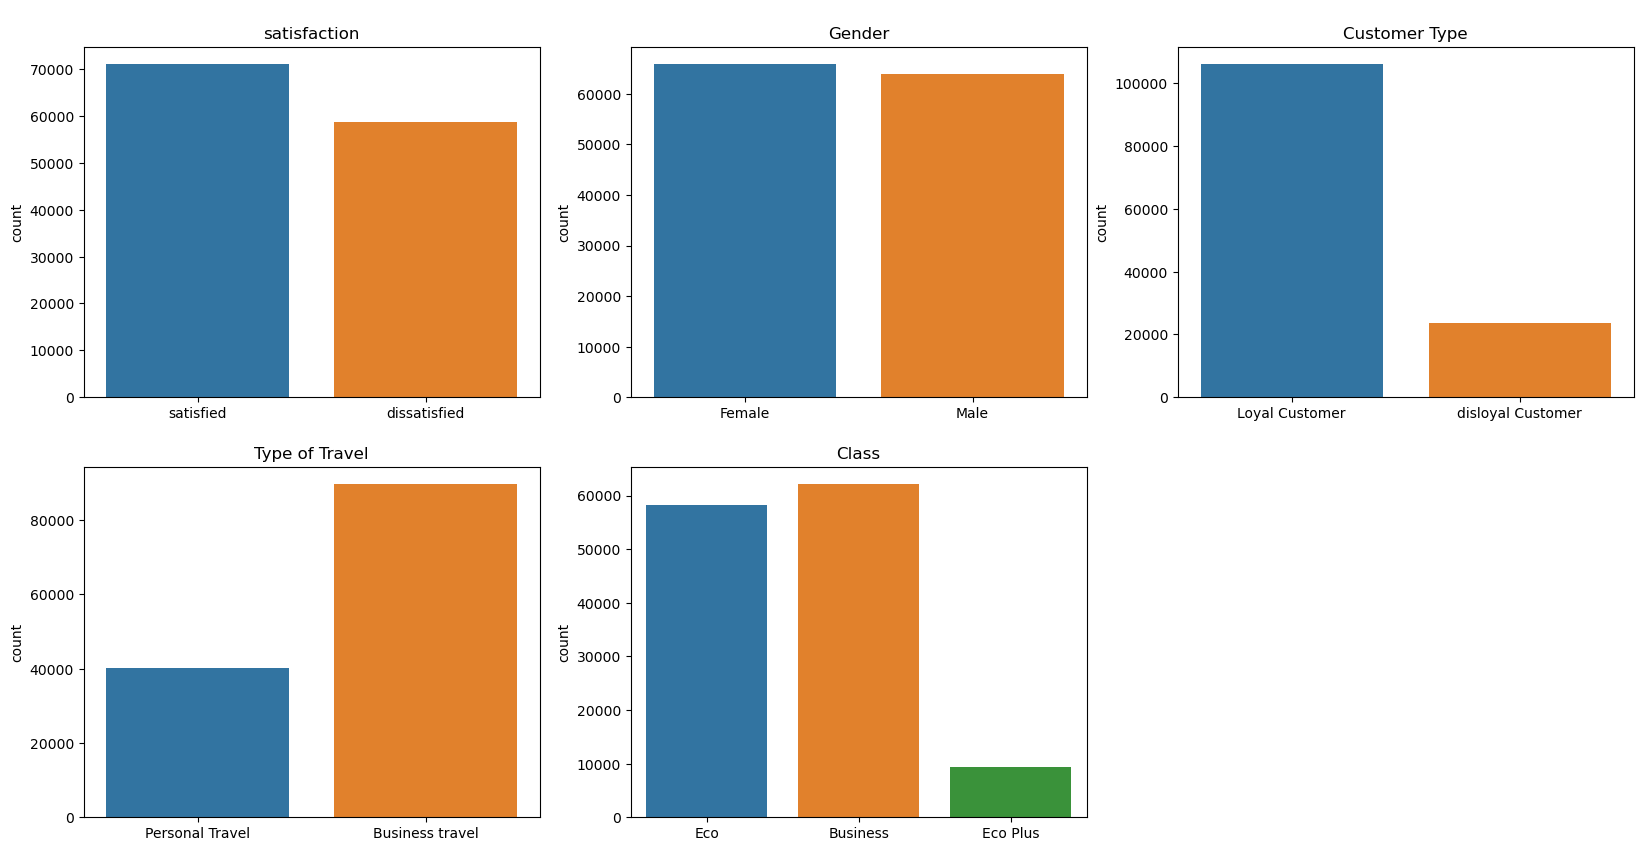

In [16]:
fig = plt.figure(figsize=(20,10))
n_columns = 3
n_rows = 2

for position in range(1, ((n_columns * n_rows) + 1)):
    if position > len(df.describe(include='object').columns):
        break
    else:
        fig.add_subplot(n_rows, n_columns, position)
        sns.countplot(data=df, x=df[df.describe(include='object').columns.to_list()[position-1]]).set(title=f'\n{df.describe(include="object").columns.to_list()[position-1]}', xlabel='')
plt.show()

This graph visualizes a more compact and intuitive representation based on the two previous insights regarding the characteristics of Invistico Airline passengers.

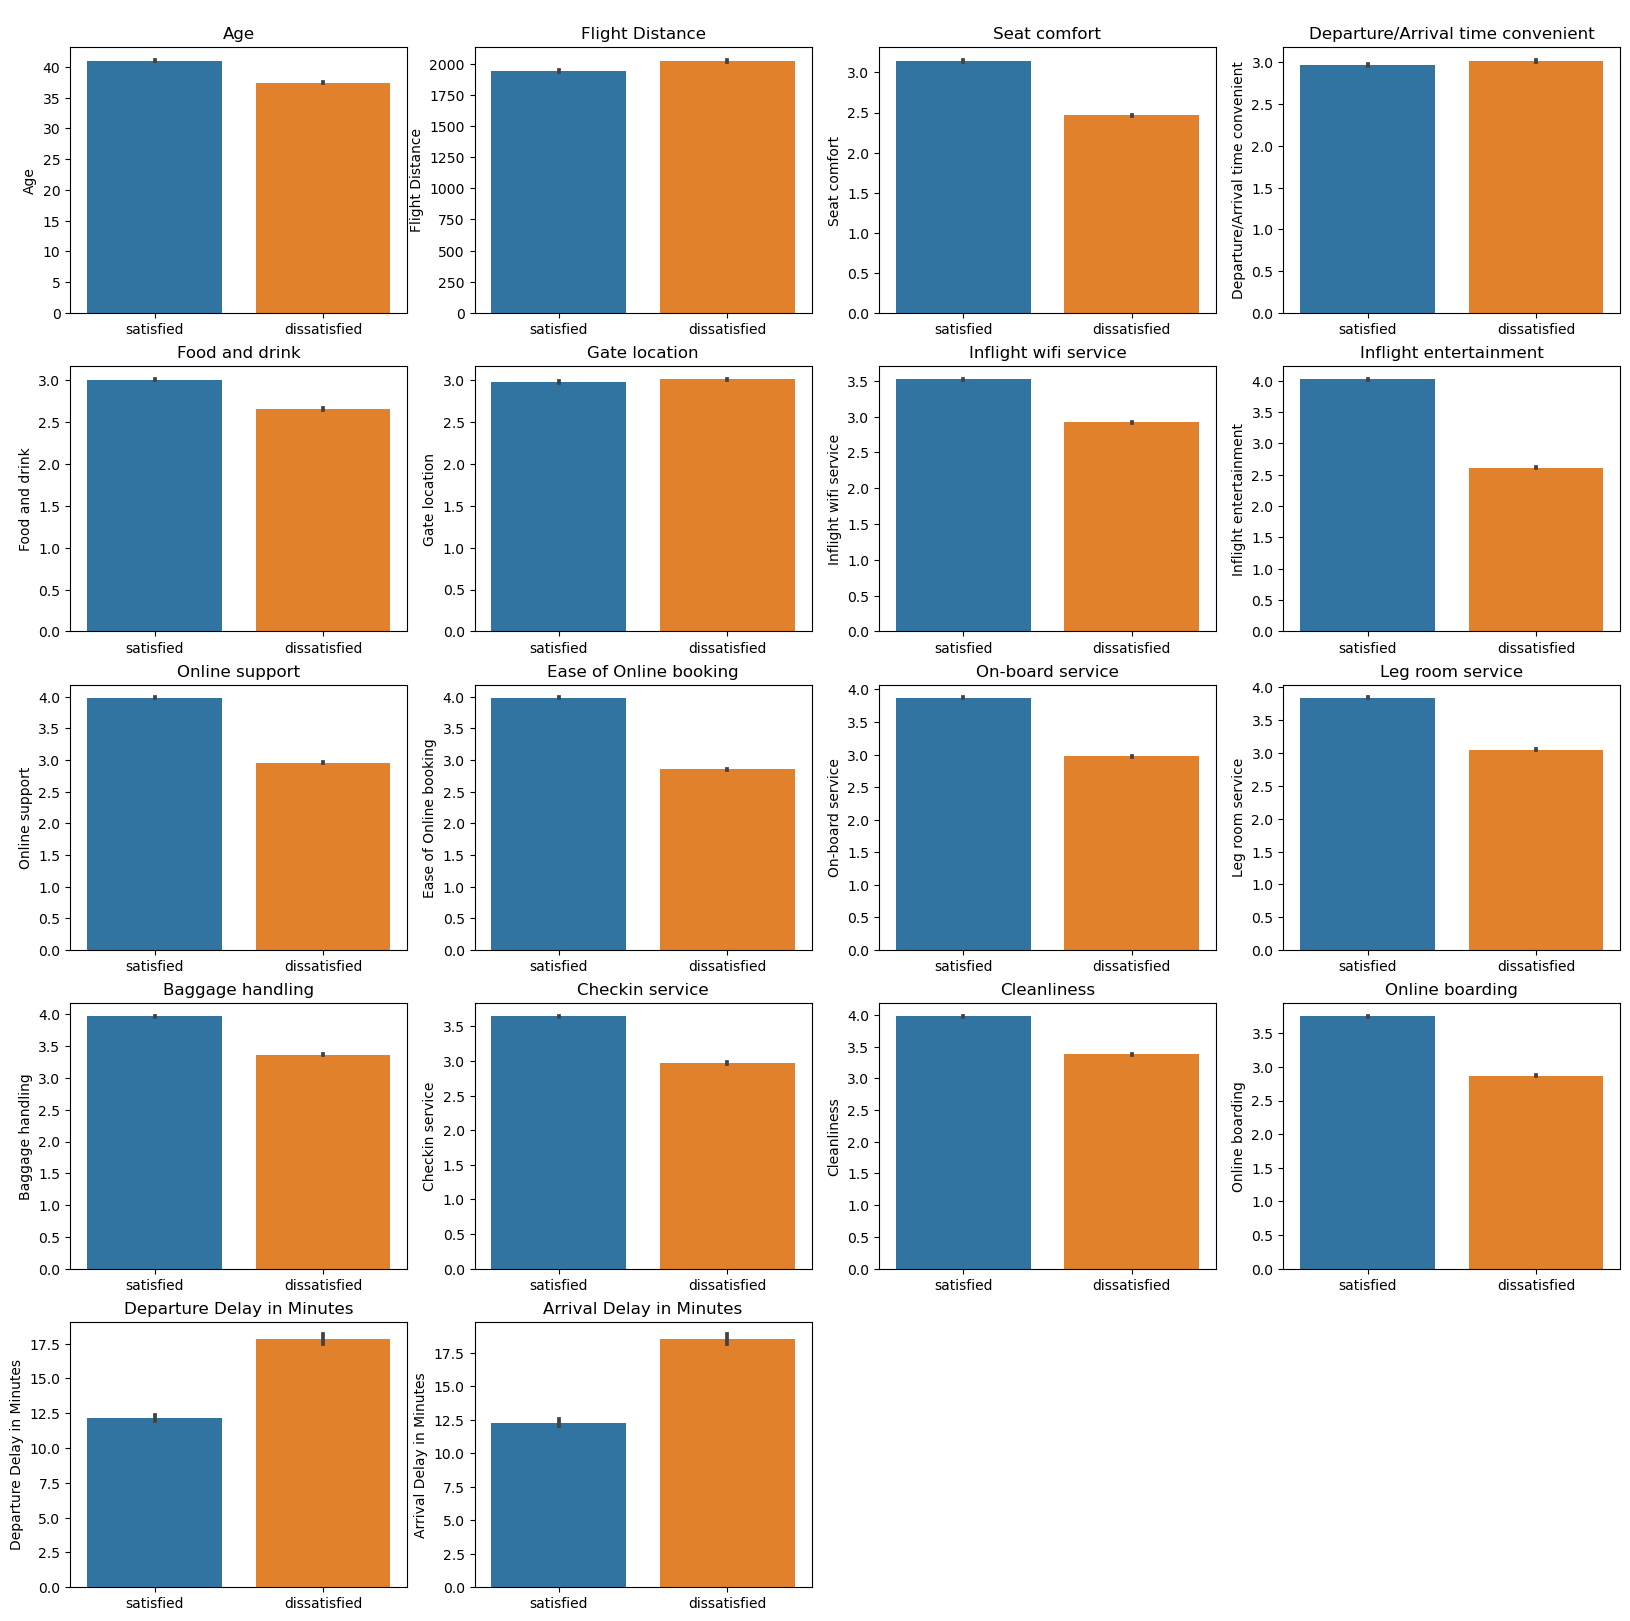

In [17]:
fig = plt.figure(figsize=(20,20))
n_columns = 4
n_rows = 5

for position in range(1, ((n_columns * n_rows) + 1)):
    if position > len(df.describe(exclude='object').columns):
        break
    else:
        fig.add_subplot(n_rows, n_columns, position)
        sns.barplot(data=df, x='satisfaction', y=df[df.describe(exclude='object').columns.to_list()[position-1]]).set(title=f'\n{df.describe(exclude="object").columns.to_list()[position-1]}', xlabel='')
plt.show()

- When compared side by side, passengers who are satisfied tend to give higher service ratings than those who are not satisfied.
- It is also found that passengers who gave satisfying testimony experienced minimal delays in departure or arrival compared to passengers who are dissatisfied.

## D3. Dissatisfied Passenger Information

In [18]:
display(df[df['satisfaction'] == 'dissatisfied'].describe(include='object').T)
display(df[df['satisfaction'] == 'dissatisfied'].describe(exclude='object').T)

,count,unique,top,freq
satisfaction,58793,1,dissatisfied,58793
Gender,58793,2,Male,35822
Customer Type,58793,2,Loyal Customer,40713
Type of Travel,58793,2,Business travel,37337
Class,58793,3,Eco,35336


,count,mean,std,min,25%,50%,75%,max
Age,58793.0,37.466671,15.888110,7.0,25.0,36.0,49.0,85.0
Flight Distance,58793.0,2025.709234,888.148947,50.0,1520.0,1955.0,2462.0,6951.0
Seat comfort,58793.0,2.467335,0.996059,0.0,2.0,2.0,3.0,5.0
Departure/Arrival time convenient,58793.0,3.016686,1.510006,0.0,2.0,3.0,4.0,5.0
Food and drink,58793.0,2.660419,1.243593,0.0,2.0,3.0,4.0,5.0
Gate location,58793.0,3.007756,1.215827,1.0,2.0,3.0,4.0,5.0
Inflight wifi service,58793.0,2.919854,1.345014,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,58793.0,2.608644,1.097104,0.0,2.0,3.0,3.0,5.0
Online support,58793.0,2.959213,1.283645,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,58793.0,2.852261,1.302929,0.0,2.0,3.0,4.0,5.0


- Even if they are loyal customers, there is a chance that a particular customer may still be dissatisfied with the airline's support and services.
- Based on the observation above, we can conclude that the mean satisfaction score for in-flight entertainment services received the lowest average score among those who are dissatisfied with their flying experience with Invistico. This may indicate a long-flight, unamusing experience related to the available entertainment offered by Invistico Airline.

In [19]:
display(df[df['satisfaction'] == 'satisfied'].describe(include='object').T)
display(df[df['satisfaction'] == 'satisfied'].describe(exclude='object').T)

,count,unique,top,freq
satisfaction,71087,1,satisfied,71087
Gender,71087,2,Female,42928
Customer Type,71087,2,Loyal Customer,65387
Type of Travel,71087,2,Business travel,52356
Class,71087,3,Business,44095


,count,mean,std,min,25%,50%,75%,max
Age,71087.0,41.050051,14.250302,7.0,30.0,42.0,52.0,85.0
Flight Distance,71087.0,1944.770281,1127.893115,50.0,1070.0,1886.0,2627.0,6950.0
Seat comfort,71087.0,3.145653,1.586321,0.0,2.0,4.0,4.0,5.0
Departure/Arrival time convenient,71087.0,2.969108,1.540998,0.0,2.0,3.0,4.0,5.0
Food and drink,71087.0,3.010438,1.572813,0.0,2.0,3.0,4.0,5.0
Gate location,71087.0,2.976086,1.375912,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,71087.0,3.521460,1.231971,0.0,3.0,4.0,5.0,5.0
Inflight entertainment,71087.0,4.024308,1.186479,0.0,4.0,4.0,5.0,5.0
Online support,71087.0,3.983260,1.131930,1.0,4.0,4.0,5.0,5.0
Ease of Online booking,71087.0,3.984751,1.062831,1.0,4.0,4.0,5.0,5.0


- Customers categorized as loyal customers tend to fly with Invistico Airline for business occasions with a business class ticket.
- However, these satisfied customers rated in-flight entertainment relatively high compared to any other services offered. This may indicate that business class passengers receive more satisfying entertainment compared to those with economy class tickets.

## D4. Data Distribution

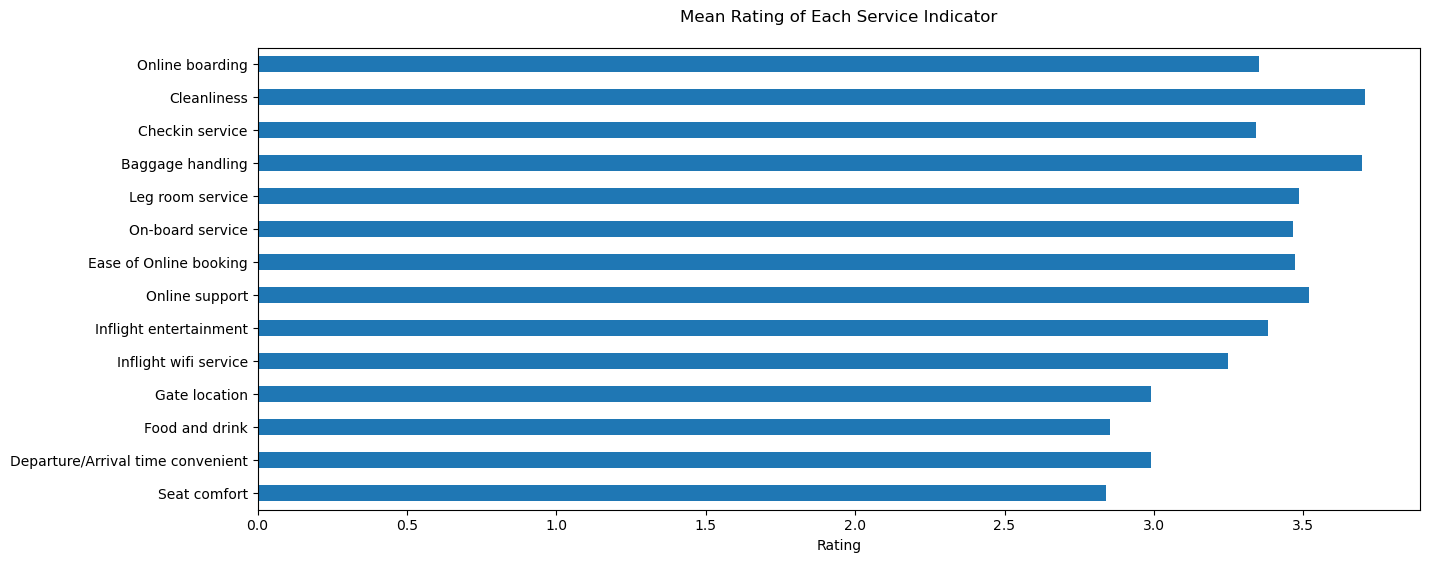

In [20]:
plt.figure(figsize=(15,6))
df[disc_cols].mean().plot(kind='barh')
plt.title('Mean Rating of Each Service Indicator\n')
plt.xlabel('Rating')
plt.show()

The cleanliness aspect of Invistico Airline already receives a higher rating mean. It also depicts that the airline is known for its quality in baggage handling and online support. However, there are many aspects that need to be improved, as most passengers have not yet fully satisfied with the seat comfort, in-flight food and beverage, gate location that seems uneasy to access, and convenient timing.

In [21]:
def distribution_plot(dataframe, column, kdeBool):
    '''
    This function aims to automate distribution charting and outlier mapping. It is optimized only for columns with a data type of continuous numeric.
    INPUT: dataset, list of column(s), boolean value for histogram's kde.
    OUTPUT: histogram, bar chart with upper outlier bound limit, lower bound value, upper bound value, skewness score, number of outliers, and percentage of outliers.
    '''
    if kdeBool != True or kdeBool != False:
        try:
            feature = dataframe[column]            
            mean = feature.mean()
            std = feature.std()
            q1 = feature.quantile(0.25)
            median = feature.median()
            q3 = feature.quantile(0.75)
            skew = feature.skew()
            upBound = 0
            lowBound = 0
            iqr = q3 - q1
            if skew >= -0.5 and skew <= 0.5:
                upBound = mean + (3*std)
                lowBound = mean - (3*std)
            else:
                upBound = median + (1.5*iqr)
                lowBound = median - (1.5*iqr)
            countOutlier = len(dataframe[(dataframe[column] <= lowBound) | (dataframe[column] > upBound)])
            percOutlier = (countOutlier * 100) / len(dataframe[column])
            
            plt.figure(figsize=(15,5))
            plt.subplot(1,2,1)
            sns.histplot(data=dataframe, x=column, kde=kdeBool).set(title=f'{column} Distribution', xlabel=f'{column}', ylabel='Frequency')
            plt.subplot(1,2,2)
            sns.boxplot(data=dataframe, x=column).set(title=f'{column} Distribution', xlabel=f'{column}', ylabel='Frequency')
            plt.axvline(x=upBound, color='r')
            plt.show()
            
            data = {'lower_bound':lowBound, 'upper_bound':upBound, 'skewness': skew, 'outliers': countOutlier, 'outliers(%)': percOutlier}
            print(f'Number of outliers within {column}:')
            display(pd.DataFrame(data=[data]))
        except:
            raise ValueError(f'[{column}] is not in dataframe.')
    else:
        print(f"kdeBool param should be boolean (user's input: {kdeBool}).")

Before we continue, we need an algorithm to automate our repetitive task of generating visualizations of data distribution and identifying outlier positions for each desired column.

1. The Distribution of Age


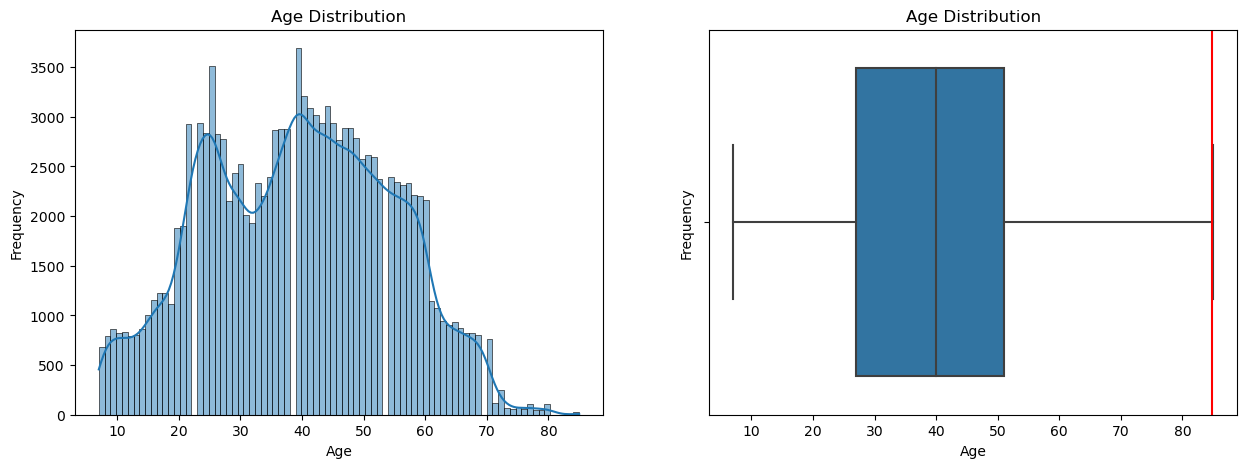

Number of outliers within Age:


,lower_bound,upper_bound,skewness,outliers,outliers(%)
0,-5.930123,84.786036,-0.003606,25,0.019249


2. The Distribution of Flight Distance


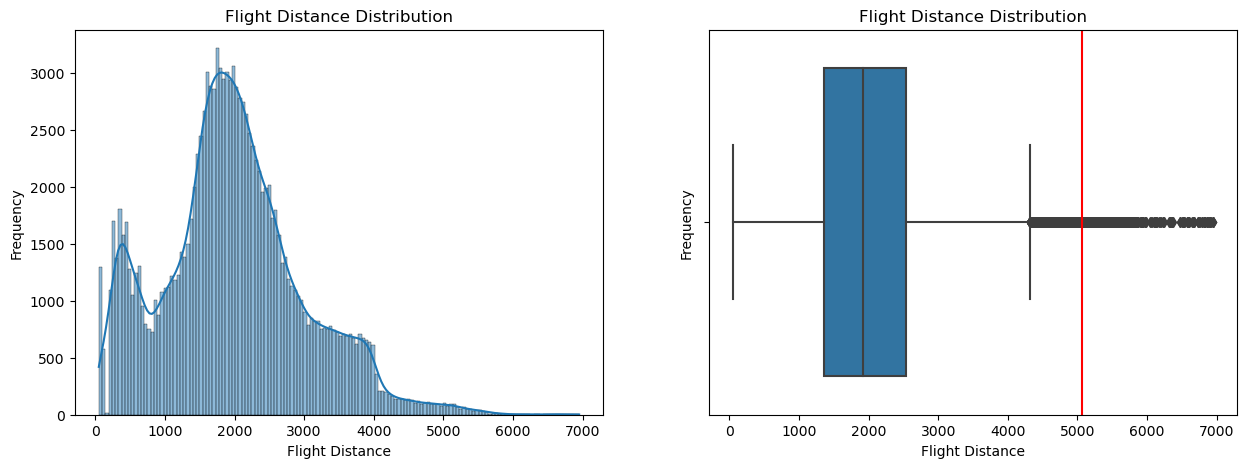

Number of outliers within Flight Distance:


,lower_bound,upper_bound,skewness,outliers,outliers(%)
0,-1099.937762,5062.755871,0.466748,830,0.639051


3. The Distribution of Departure Delay in Minutes


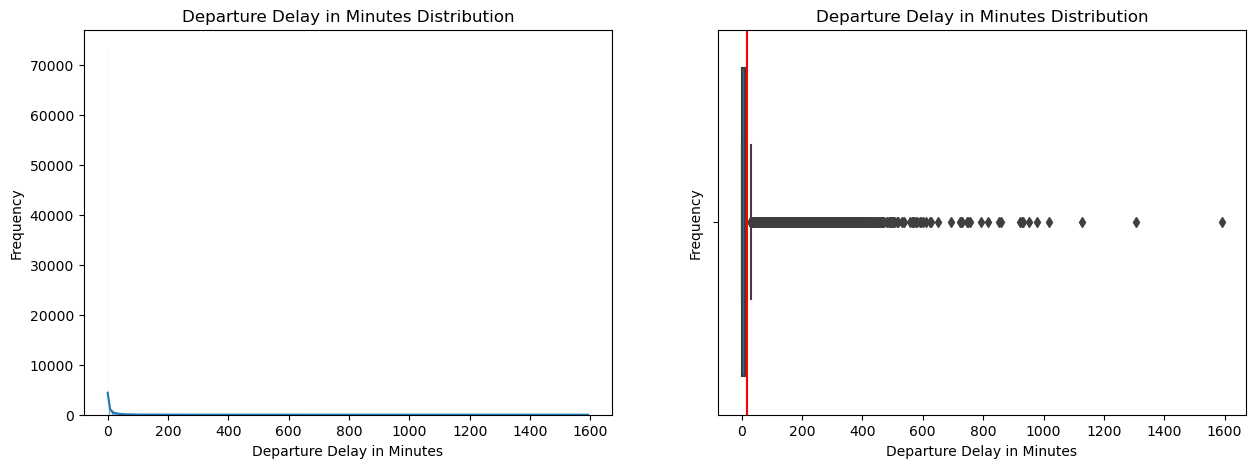

Number of outliers within Departure Delay in Minutes:


,lower_bound,upper_bound,skewness,outliers,outliers(%)
0,-18.0,18.0,6.82198,26008,20.024638


4. The Distribution of Arrival Delay in Minutes


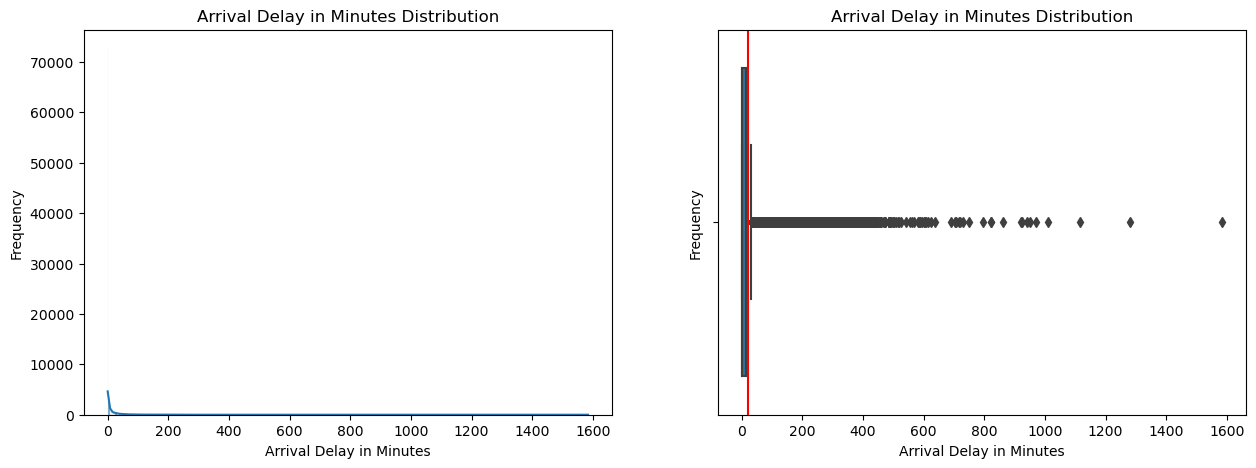

Number of outliers within Arrival Delay in Minutes:


,lower_bound,upper_bound,skewness,outliers,outliers(%)
0,-19.5,19.5,6.670125,25657,19.754389


In [22]:
for col in cont_cols:
    print(f'{cont_cols.index(col) + 1}. The Distribution of {col}')
    distribution_plot(dataframe=df, column=col, kdeBool=True)

- Among the more than 129,000 records used in this modeling, only 25 data points are considered outliers according to the Age column (0.019249%). Passengers beyond 84 years old are considered outliers according to the `Age` column.
- There are 830 passengers who have flown more than 5063 miles, considered as outliers. This number represents 0.64 percent of all the records collected.
- According to the distribution principle, flights with a departure delay longer than 18 minutes or an arrival delay longer than 19 minutes are considered outlier data.
- There are 26,008 outliers according to the departure delay column (20% of records), while according to the arrival delay column, there are 25,657 outlier data points (19.75% of records).

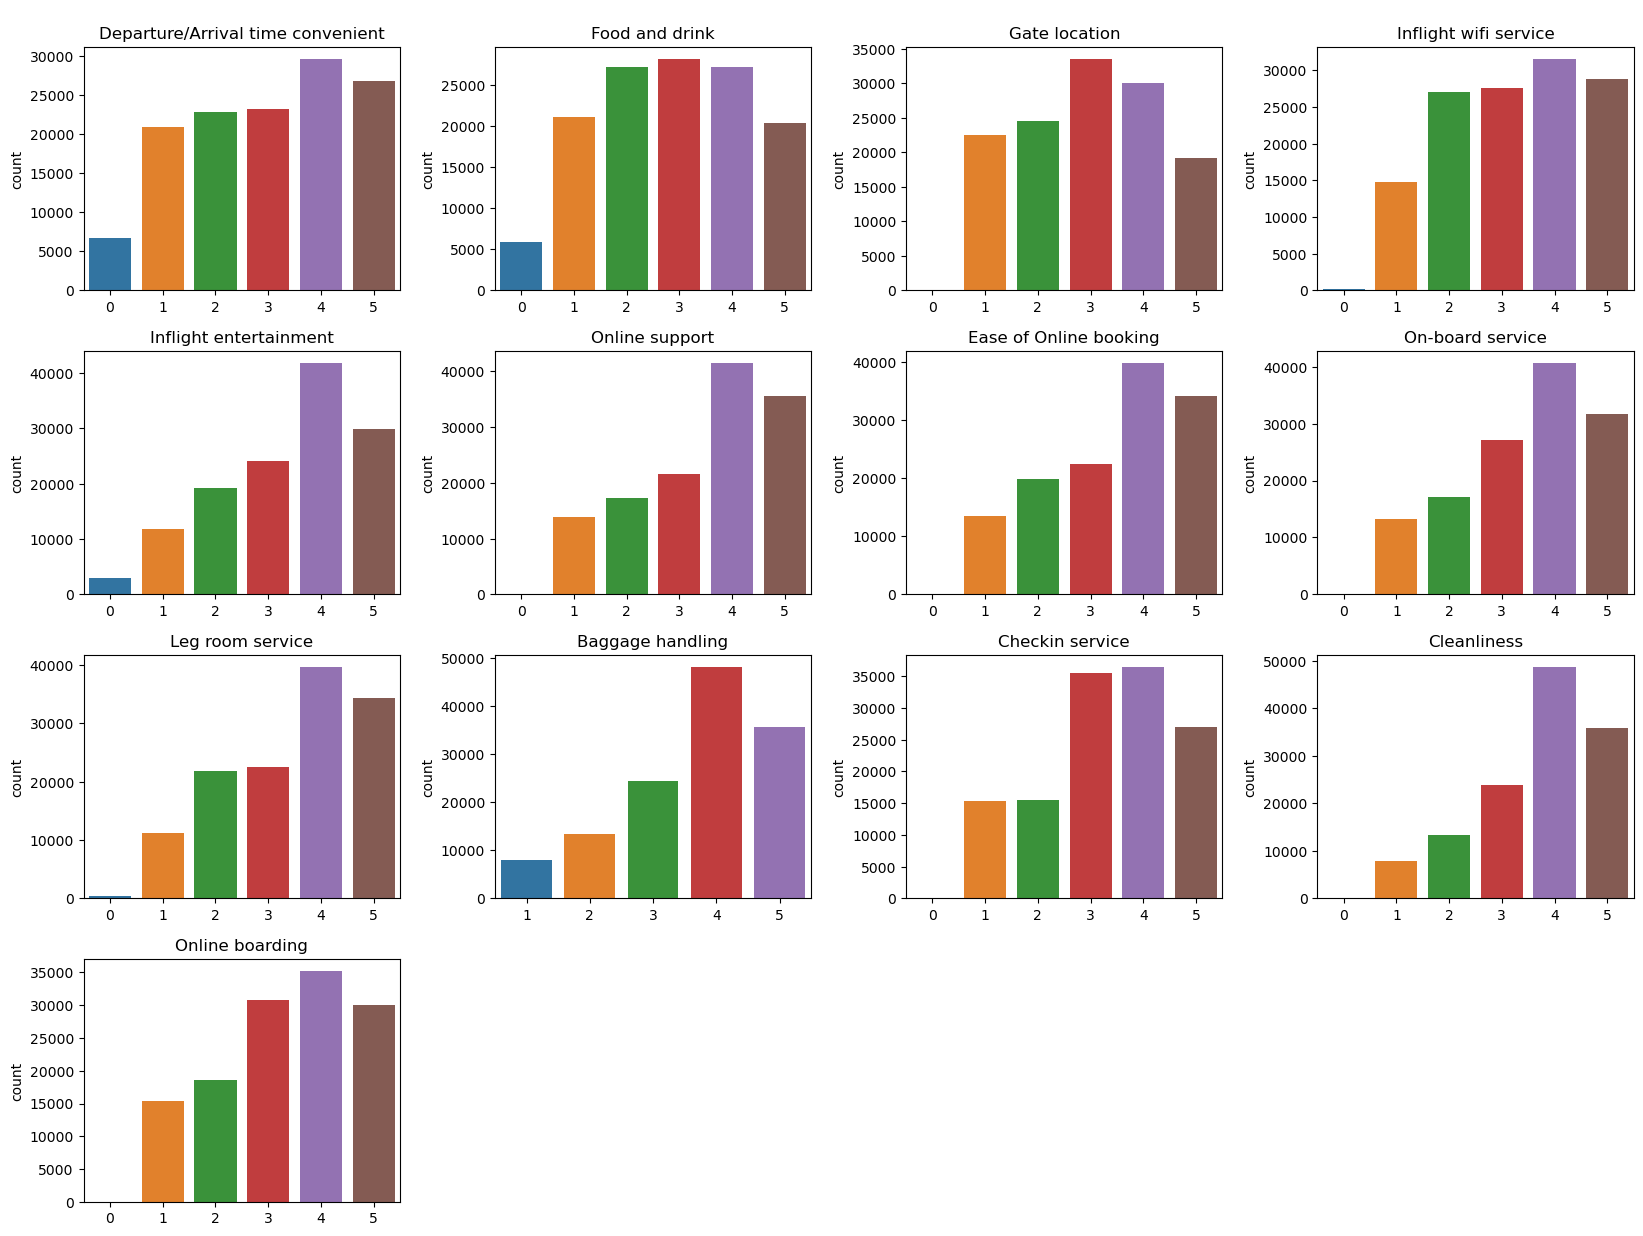

In [23]:
fig = plt.figure(figsize=(20,15))
n_columns = 4
n_rows = 4

for position in range(1, ((n_columns * n_rows) + 1)):
    if position > len(disc_cols) - 1:
        break
    else:
        fig.add_subplot(n_rows, n_columns, position)
        sns.countplot(data=df, x=disc_cols[position]).set(title=f'\n{disc_cols[position]}', xlabel='')
        fig.subplots_adjust(hspace=0.25, wspace=0.3)
plt.show()

There is a significant number of airline passengers who gave a rating of 0 for departure/arrival time convenience, in-flight food and beverage services, and in-flight entertainment. This suggests that for some people, these services are far below their expectations and need improvement.
On the other hand, there is also a significant number of airline passengers who gave their highest score for departure/arrival time convenience, in-flight Wi-Fi service, online support, and online booking service.
An unequal rating is observed in departure or arrival time convenience, which we may presume exists due to multiple factors we previously indicated, such as ticket class.

# E. Feature Engineering  
  
We have gained enough insights to continue our stage into the modeling process. Before we start modeling, we should prepare ourselves with clean and finalized data that is compatible for the modeling process. This process includes:
  
- Cleaning data from missing and duplicate values
- Target checking
- Feature and target table splitting
- Train and test dataset splitting
- Outlier handling
- Categorical data encoding
- Numerical data scaling
  
Most of these steps involve pipeline processing to automate and simplify our working process, resulting in one integrated end-to-end modeling output at the end of the model creation stage.

## E1. Understanding Missing and Duplicate Value Behaviour  
  
Our prior observation in cell 4 suggests that null values exist only in a column containing information about arrival delay in minutes. As far as we know, a valid arrival delay in minutes value is either 0 minutes (no delay) or more than 0 minutes (delayed).

In [24]:
print('Data records contain null value:')
display(df[df['Arrival Delay in Minutes'].isnull() == True].head(8))
print('Data records contain arrival delay = 0::')
display(df[df['Arrival Delay in Minutes'] == 0].head(8))

Data records contain null value:


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,4,5,0,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,4,2,0,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,3,5,0,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,4,3,0,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,1,4,1,4,4,4,5,1,5,1,4,0,NaN
1162,dissatisfied,Male,Loyal Customer,23,Personal Travel,Eco,4650,1,1,1,3,2,1,2,2,1,3,4,4,4,2,0,NaN
1267,satisfied,Female,Loyal Customer,47,Personal Travel,Eco,846,0,5,0,5,4,2,2,3,3,0,3,5,3,5,0,NaN
1301,dissatisfied,Male,Loyal Customer,32,Personal Travel,Eco,1772,1,1,1,3,4,1,1,4,4,1,2,4,3,4,22,NaN


Data records contain arrival delay = 0::


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
11,satisfied,Female,Loyal Customer,34,Personal Travel,Eco,3633,0,0,0,4,2,0,2,2,3,2,5,2,5,2,0,0.0


Passengers who experience no delay in departure tend to have no delay in arrival. However, passengers who have missing values in the arrival delay column exhibit varying values of departure delay. For those with 0 minutes departure delay and a missing value in the arrival delay, it seems that the appropriate value for the arrival delay is 0. Since there are also data points with missing values in arrival delay but more than 0 minutes in departure delay, we can conclude that any missing value present in the arrival delay column is considered as a missing completely at random occurrence during data input caused by instrument fault or system malfunction, which may not allow for exception handling but forcibly continue the data input with the presence of missing values.

In [25]:
print(f'Sum of records with null values within any column: {df.isnull().sum().values.sum()} data.')
print(f'Sum of duplicated records: {df.duplicated().sum()} data.')

Sum of records with null values within any column: 393 data.
Sum of duplicated records: 0 data.


There are 393 records with missing value within the dataset. There are no duplicate record entry.

In [26]:
drop_df = df.copy()
drop_df = drop_df.dropna().drop_duplicates().reset_index(drop=True)

drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

Since we identified that our missing values came from a completely random occurrence, our best effort to handle them is by dropping them to avoid model misinterpretation and confusion. Besides, it is also found that the number of missing values within the dataset remains insignificant. Hence, we presume that it is safe to drop the records containing missing values.

Moreover, we finally have a cleaner dataset without duplicates and records that contain missing values in any column within the dataset. This dataset contains 129,486 records.

## E2. Map the Target Column Value  
  
Since our target column is still in string category form, we need to convert it into numerical format so the computer can fully read and understand the data. In consideration of business domain factors, we decide to map class 1 as 'dissatisfied' and 0 as 'satisfied'.

- Class 1 represents a positive value for prediction, while class 0 represents a negative value for prediction.
- Our goal is to predict customer satisfaction, with a focus on dissatisfaction, aiming to fully understand what causes customers to become dissatisfied with the airline services received.
- By setting 'dissatisfied' as a positive value, we want to ensure that the model is able to accurately predict when a particular passenger may be dissatisfied due to various factors.

In [27]:
map_satisfaction = {'satisfied': 0, 'dissatisfied': 1}

mapped_df = drop_df.copy()
mapped_df['satisfaction'] = mapped_df['satisfaction'].map(map_satisfaction)

mapped_df.tail(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129477,0,Female,disloyal Customer,55,Personal Travel,Eco,1953,5,2,5,4,1,5,5,1,1,1,3,3,4,1,0,0.0
129478,0,Female,disloyal Customer,70,Personal Travel,Eco,1674,5,4,5,1,5,5,5,5,3,2,4,5,4,5,54,46.0
129479,0,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,5,3,2,5,2,2,4,5,4,4,3,2,9,0.0
129480,0,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,5,3,4,5,4,4,5,4,4,3,4,4,4,0.0
129481,0,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,2,2,5,2,2,3,5,3,5,4,2,5,0.0
129482,0,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129483,1,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129484,1,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129485,1,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0
129486,1,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,3,3,3,4,5,5,5,3,3,3,185,186.0


Our cleaned target dataset has been mapped to binary values, 0 and 1.

## E2. Data Splitting

In [28]:
X = mapped_df.drop(columns='satisfaction', axis=1)
y = mapped_df['satisfaction']

To facilitate modeling, we need to separate our dataset into two subsets: one containing only the features (X) and the other containing only the target (y).

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)

At this stage, we have successfully divided our dataset into training and testing sets. Since the classes of our target variable are not equally distributed, we should stratify our splitting according to the y table.  
  
It is also worth to mention since our data is well-balanced (55:45), I decided to skip data balancing process and continue our basis to split train and test dataset with y-based stratification.

In [30]:
display(X_train.head(10))
display(X_train.shape)
display(X_test.head(10))
display(X_test.shape)
display(y_train.head(10))
display(y_train.shape)
display(y_test.head(10))
display(y_test.shape)
display(y_train.value_counts())
display(y_test.value_counts())

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
8328,Male,Loyal Customer,60,Personal Travel,Eco Plus,984,2,1,0,3,3,0,3,3,4,4,3,1,4,3,0,32.0
25222,Male,Loyal Customer,52,Personal Travel,Eco Plus,1971,3,4,3,2,2,3,2,2,3,3,5,3,5,2,55,51.0
75285,Male,Loyal Customer,55,Business travel,Eco,1609,2,1,3,1,2,2,2,2,3,1,3,3,3,2,6,7.0
33655,Male,Loyal Customer,61,Personal Travel,Eco,2022,4,3,4,3,4,4,5,4,1,2,4,1,4,4,0,0.0
68808,Male,Loyal Customer,40,Business travel,Business,2574,1,5,5,5,1,4,4,1,1,1,1,2,1,1,0,0.0
111324,Female,Loyal Customer,43,Business travel,Eco,712,5,3,5,3,5,3,5,4,4,5,4,5,4,5,0,8.0
31693,Female,Loyal Customer,40,Personal Travel,Eco,2877,3,5,4,1,5,4,5,5,5,2,3,5,5,5,6,21.0
33880,Male,Loyal Customer,34,Personal Travel,Eco,2130,4,3,4,5,1,4,1,1,4,2,1,4,1,1,0,0.0
59785,Female,disloyal Customer,21,Business travel,Eco,1902,4,4,4,4,4,2,2,3,3,3,4,2,3,2,0,0.0
38472,Female,Loyal Customer,13,Personal Travel,Eco,2367,5,2,5,3,4,5,4,4,4,5,3,4,3,4,0,13.0


(97115, 22)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
10287,Female,Loyal Customer,70,Personal Travel,Eco,406,1,1,3,1,4,4,4,4,5,5,5,4,5,4,0,9.0
37258,Female,Loyal Customer,44,Personal Travel,Eco,997,4,5,4,3,1,5,5,4,4,4,4,2,4,3,0,93.0
57327,Male,disloyal Customer,22,Business travel,Business,3570,4,1,4,1,2,4,2,2,3,3,3,3,5,2,0,0.0
25674,Female,Loyal Customer,25,Personal Travel,Eco Plus,3271,3,4,3,3,3,4,4,5,5,4,4,4,3,4,187,194.0
45212,Female,disloyal Customer,48,Business travel,Eco Plus,2131,2,1,1,3,4,2,4,4,2,3,3,1,3,4,0,0.0
30293,Male,Loyal Customer,61,Personal Travel,Eco,2284,3,5,3,3,3,3,3,3,5,4,5,5,5,3,0,0.0
70608,Male,Loyal Customer,42,Business travel,Business,1998,3,3,3,3,2,4,5,2,2,2,2,3,2,4,0,8.0
77631,Male,Loyal Customer,44,Business travel,Eco,1945,2,4,4,4,3,2,3,3,3,5,2,3,2,3,0,9.0
20698,Male,Loyal Customer,52,Personal Travel,Eco Plus,2063,3,1,3,3,3,3,1,3,4,4,4,2,4,3,0,0.0
46710,Male,disloyal Customer,50,Business travel,Business,1298,2,2,2,3,2,2,2,2,4,4,4,4,4,2,4,15.0


(32372, 22)

8328      1
25222     1
75285     1
33655     1
68808     1
111324    0
31693     1
33880     1
59785     1
38472     0
Name: satisfaction, dtype: int64

(97115,)

10287    0
37258    1
57327    0
25674    1
45212    1
30293    1
70608    0
77631    1
20698    1
46710    1
Name: satisfaction, dtype: int64

(32372,)

satisfaction
0    53161
1    43954
Name: count, dtype: int64

satisfaction
0    17721
1    14651
Name: count, dtype: int64

The output above is to check the result of the splitting.

## E3. Feature Selection with Correlation Approach  
  
Feature selection could be done using the correlation assumption, which suggests that important features may have a significant correlation with the target. To do this, I decided to correlate each column in the X_train table with y_train. I only checked X_train for two reasons: to prevent data leakage and because it should be sufficient to examine the correlation from 75% of the raw dataset used for the training set.

First, we are going to encode all string category columns in X_train and combine them with y_train temporarily. Then, we should perform Kendall's Tau correlation since we are working with categorical correlation.

In [31]:
X_train_temp_remap_df = X_train.copy()
y_train_temp_remap_df = y_train.copy()
map_gender = {'Female': 1, 'Male': 2}
map_cust_type = {'Loyal Customer':1, 'disloyal Customer':2}
map_travel_type = {'Personal Travel':1, 'Business travel':2}
map_class = {'Eco':1, 'Business':2, 'Eco Plus':3}

X_train_temp_remap_df['Gender'] = X_train_temp_remap_df['Gender'].map(map_gender)
X_train_temp_remap_df['Customer Type'] = X_train_temp_remap_df['Customer Type'].map(map_cust_type)
X_train_temp_remap_df['Type of Travel'] = X_train_temp_remap_df['Type of Travel'].map(map_travel_type)
X_train_temp_remap_df['Class'] = X_train_temp_remap_df['Class'].map(map_class)

display(X_train_temp_remap_df.head(10))
display(y_train_temp_remap_df.head(10))

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
8328,2,1,60,1,3,984,2,1,0,3,3,0,3,3,4,4,3,1,4,3,0,32.0
25222,2,1,52,1,3,1971,3,4,3,2,2,3,2,2,3,3,5,3,5,2,55,51.0
75285,2,1,55,2,1,1609,2,1,3,1,2,2,2,2,3,1,3,3,3,2,6,7.0
33655,2,1,61,1,1,2022,4,3,4,3,4,4,5,4,1,2,4,1,4,4,0,0.0
68808,2,1,40,2,2,2574,1,5,5,5,1,4,4,1,1,1,1,2,1,1,0,0.0
111324,1,1,43,2,1,712,5,3,5,3,5,3,5,4,4,5,4,5,4,5,0,8.0
31693,1,1,40,1,1,2877,3,5,4,1,5,4,5,5,5,2,3,5,5,5,6,21.0
33880,2,1,34,1,1,2130,4,3,4,5,1,4,1,1,4,2,1,4,1,1,0,0.0
59785,1,2,21,2,1,1902,4,4,4,4,4,2,2,3,3,3,4,2,3,2,0,0.0
38472,1,1,13,1,1,2367,5,2,5,3,4,5,4,4,4,5,3,4,3,4,0,13.0


8328      1
25222     1
75285     1
33655     1
68808     1
111324    0
31693     1
33880     1
59785     1
38472     0
Name: satisfaction, dtype: int64

The operation above successfully mapped the feature columns to a numerical category.

In [32]:
temp_y = []
for entry in y_train_temp_remap_df.values:
    temp_y.append(entry)
    
X_train_temp_remap_df['satisfaction'] = temp_y

display(X_train_temp_remap_df.head(10))
display(X_train_temp_remap_df.shape)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
8328,2,1,60,1,3,984,2,1,0,3,3,0,3,3,4,4,3,1,4,3,0,32.0,1
25222,2,1,52,1,3,1971,3,4,3,2,2,3,2,2,3,3,5,3,5,2,55,51.0,1
75285,2,1,55,2,1,1609,2,1,3,1,2,2,2,2,3,1,3,3,3,2,6,7.0,1
33655,2,1,61,1,1,2022,4,3,4,3,4,4,5,4,1,2,4,1,4,4,0,0.0,1
68808,2,1,40,2,2,2574,1,5,5,5,1,4,4,1,1,1,1,2,1,1,0,0.0,1
111324,1,1,43,2,1,712,5,3,5,3,5,3,5,4,4,5,4,5,4,5,0,8.0,0
31693,1,1,40,1,1,2877,3,5,4,1,5,4,5,5,5,2,3,5,5,5,6,21.0,1
33880,2,1,34,1,1,2130,4,3,4,5,1,4,1,1,4,2,1,4,1,1,0,0.0,1
59785,1,2,21,2,1,1902,4,4,4,4,4,2,2,3,3,3,4,2,3,2,0,0.0,1
38472,1,1,13,1,1,2367,5,2,5,3,4,5,4,4,4,5,3,4,3,4,0,13.0,0


(97115, 23)

We have reverted our X and y train splitting by combining both into a new temporary dataframe for correlation purposes.

In [33]:
corrCols = []
corrKVal = []
corrKPval = []
for item in range(len(X_train_temp_remap_df.drop(columns='satisfaction').columns.tolist())):
    col = X_train_temp_remap_df.columns[item]
    kstats, pvalk = stats.kendalltau(x=X_train_temp_remap_df[col], y=X_train_temp_remap_df['satisfaction'])
    corrCols.append(col)
    corrKVal.append(kstats)
    corrKPval.append(pvalk)
    
display((pd.DataFrame(data={'columns':corrCols, 'correlation':corrKVal, 'p-value':corrKPval})).sort_values(by='correlation', ascending=False))

,columns,correlation,p-value
1,Customer Type,0.291364,0.000000e+00
0,Gender,0.212199,0.000000e+00
21,Arrival Delay in Minutes,0.092350,2.102316e-225
20,Departure Delay in Minutes,0.065514,3.788962e-114
5,Flight Distance,0.038793,1.387095e-49
7,Departure/Arrival time convenient,0.014907,1.693625e-07
9,Gate location,0.011076,1.185266e-04
2,Age,-0.106993,0.000000e+00
3,Type of Travel,-0.108193,3.350070e-249
8,Food and drink,-0.117335,0.000000e+00


According to the output, here are several columns that I decided meet the correlation assumption (threshold used=|>0.1|):

- Customer Type
- Gender
- Food and drink
- Inflight wifi service
- Class
- Seat comfort
- Check-in service
- Cleanliness
- Baggage handling
- Leg room service
- Online boarding
- On-board service
- Online support
- Ease of Online booking, and
- Inflight entertainment  
  
All of the listed columns have a linear relationship with satisfaction status. It also clears that every service satisfaction rate/metric has a correlation with the overall satisfaction of the passenger.

## E4. Feature Selection with Multicolinearity Analysis Approach  
  
We can also filter out our features based on the multicollinearity approach. This approach assumes that every feature in modeling has no mutual/same information that will lead to overfitting and model confusion on comprehending every feature behavior that will impact the target classification. Using Python, we can automate this calculation using the variance inflation factor (VIF) formula.

In [34]:
vif = pd.DataFrame()
vif["variables"] = X_train_temp_remap_df.drop(columns='satisfaction', axis=1).columns
vif["VIF"] = [variance_inflation_factor(X_train_temp_remap_df.drop(columns='satisfaction', axis=1).values, i) for i in range(X_train_temp_remap_df.drop(columns='satisfaction', axis=1).shape[1])]

Our VIF calculation is completed, provided with this output below:

In [35]:
vif.sort_values(by='VIF', ascending=True)

,variables,VIF
5,Flight Distance,5.151938
2,Age,8.206945
7,Departure/Arrival time convenient,8.746691
0,Gender,9.172947
17,Checkin service,9.697061
4,Class,9.830333
9,Gate location,10.550196
15,Leg room service,11.316086
1,Customer Type,12.285078
6,Seat comfort,12.471302


We found that every satisfaction measurement is collinear with each other. This result is expected due to the meta-assumption that every satisfied person may fill every metric with a higher rank, while every dissatisfied person may fill almost all metric scores with a lower rank.

For the purpose of this model clearance, we may proceed with the selected features based on the correlation output

## E5. Data Splitting (Between Object and Numerical Columns)

In [36]:
toEncode_colLists = ['Customer Type', 'Gender', 'Class']
num_cats_colLists = ['Seat comfort', 'Food and drink', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

To simplify the feature engineering process, it is recommended to group columns with identical properties. In this step, we are going to group column names that have string categories (toEncode_colLists) and numerical categories (num_cats_colLists).

## E6. Outlier Handling
  
This modeling does not require handling outliers since our selected columns are either already object/string-valued columns or numerical category-valued columns.

## E7. Data Encoding  
  
We should encode categorical columns that are still in an object type into numbers. To do this, I decided to use one-hot encoding since each categorical column has few categories that will not affect the feature column weight drastically. One-hot encoding will generate a column for each category of each original column, comprising binary values.

In [37]:
ohe = OneHotEncoder()

cat_pipeline = Pipeline([('onehot_encoding', ohe)])

preprocessing_pipeline = ColumnTransformer(transformers=[('num_cols', 'passthrough', num_cats_colLists),
                                                         ('cat_cols', cat_pipeline, toEncode_colLists)],
                                           remainder='drop')

preprocessing_pipeline

ColumnTransformer(transformers=[('num_cols', 'passthrough',
                                 ['Seat comfort', 'Food and drink',
                                  'Inflight wifi service',
                                  'Inflight entertainment', 'Online support',
                                  'Ease of Online booking', 'On-board service',
                                  'Leg room service', 'Baggage handling',
                                  'Checkin service', 'Cleanliness',
                                  'Online boarding']),
                                ('cat_cols',
                                 Pipeline(steps=[('onehot_encoding',
                                                  OneHotEncoder())]),
                                 ['Customer Type', 'Gender', 'Class'])])

Our process will automatically proceed using a pipeline and column transformer. We define our encoding process as onehot_encoding with OneHotEncoder(). We use this pipeline in the column transformer that skips any process for columns already having numerical categories, then runs the OHE pipeline on the target column (toEncode_colLists).

## E8. Data Scaling  
  
This modeling does not require scaling the data since all columns at this stage are categorical columns in numerical form.

# F. Model Definition  
  
To address classification modeling, there are plenty of model algorithms to choose from. However, each algorithm has its own advantages and disadvantages regarding the state of the original data used for model training and testing. In this modeling, we have identified five base models worth considering for this classification model training.

1. k-Nearest Neighbors Classifier (k-NN)  
   k-NN is one of the most famous algorithms that can handle both classification and regression modeling. In this context, the k-NN classifier will learn from the training dataset and predict any unseen data by considering the nearest number of neighbors (k) closer to the unseen data point and assigning them to that class.
   - Advantages: Does not make any assumptions like linear modeling.
   - Disadvantages: k-NN may sacrifice its own performance since it may not be suitable for high-dimensional data. Meanwhile, our dataset contains big data with medium-level dimensionality.  
2. Support Vector Machine Classifier (SVM-C)  
   SVM is also a versatile algorithm suitable for both classification and regression problems.
   - Advantages: This algorithm is robust to non-linear data, especially data with zero linear correlation but polynomial correlation, and little linear correlation but a hint of a polynomial relationship.
   - Disadvantages: This algorithm requires huge resources as its runtime increases linearly with the size of the training and predicting dataset  
3. Decision Tree Classifier
   Decision tree-based classifiers classify data into multiple layers of classification, resembling a tree with properties of roots, stems, branches, and leaves. The leaves represent a number of samples grouped with similar characteristics.
   - Advantages: A non-parametric algorithm able to handle high-dimensional data, which works best for a relatively balanced dataset.
   - Disadvantages: Not suitable for extremely imbalanced data.  
4. Random Forest Classifier **(CONCEPTUAL PROBLEM 1)**   
   Random forest (also known as a bagging model) is a well-known ensemble algorithm that works by splitting the training into a few subsets and training them independently using the Decision Tree algorithm. The predictions of all independent subsets are then voted on (for classification models) to produce a final prediction.
   - Advantages: Minimizes overfitting risk compared to using a regular decision tree algorithm.
   - Disadvantages: Slightly consumes more resources than the base model used.
5. Extra Gradient Boosting (XGBoost) Classifier **(CONCEPTUAL PROBLEM 2)**  
   XGBoost is one of the well-known boosting model algorithms that work by combining multiple individual model predictions iteratively, with each iteration focused on improving the previous error fixing. This boosting algorithm uses a weak learner algorithm (decision tree classifier) as its base model.  
     
   XGBoost is relatively different from the regular Random Forest classifier. Random Forest is known as a bagging model algorithm, where XGBoosting is a boosting algorithm.  
     
   Random Forest works by splitting the training set into various subsets that are trained in parallel using weak learners, such as decision trees. The best result is then voted upon in the case of classification predictions.  
     
   Although XGBoost uses the same base model as Random Forest, it works by splitting subsets of data for an iterative learning process. Each iteration is focused on improving upon the mistakes or underperformance of the previous one.
   - Advantages: Able to handle complex relationships within data with its versatility benefits.
   - Disadvantages: Requires more resource allocation to perform rigorous iteration regarding the desired hyperparameter tuning.

In [38]:
default_knn = KNeighborsClassifier()
default_svmc = SVC()
default_decTree = DecisionTreeClassifier()
default_randFor = RandomForestClassifier()
default_xgboost = XGBClassifier()

We have finished configuring each default model algorithm and assigned them to different/specific variables.

# G. Model Training

## G1. Base Model

### G1-A. k-Nearest Neighbors Base Model

In [39]:
# Base K-NN model
base_knn_model = Pipeline([('preprocessor', preprocessing_pipeline),
                           ('base_knn', default_knn)])
base_knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols', 'passthrough',
                                                  ['Seat comfort',
                                                   'Food and drink',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('onehot_encoding',
                                                                   OneHotEncoder())]),
                                                  ['Customer Type', 'Gender',
                                                   'Class'])])),
                ('base_knn', KNeighborsClassifier())])

A base model using the default k-Nearest Neighbors algorithm has been successfully integrated with a column transformer preprocessor and is ready for evaluation.

### G1-B. SVM Classifier Base Model

In [40]:
base_svm_model = Pipeline([('preprocessor', preprocessing_pipeline),
                           ('base_svm', default_svmc)])

base_svm_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols', 'passthrough',
                                                  ['Seat comfort',
                                                   'Food and drink',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('onehot_encoding',
                                                                   OneHotEncoder())]),
                                                  ['Customer Type', 'Gender',
                                                   'Class'])])),
                ('base_svm', SVC())])

A base model using the default support vector machine classifier algorithm has been successfully integrated with a column transformer preprocessor and is ready for evaluation.

### G1-C. Decision Tree Classifier Base Model

In [41]:
base_decTree_model = Pipeline([('preprocessor', preprocessing_pipeline),
                               ('base_decTree', default_decTree)])
base_decTree_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols', 'passthrough',
                                                  ['Seat comfort',
                                                   'Food and drink',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('onehot_encoding',
                                                                   OneHotEncoder())]),
                                                  ['Customer Type', 'Gender',
                                                   'Class'])])),
                ('base_decTree', DecisionTreeClassifier())])

A base model using the default decision tree classifier algorithm has been successfully integrated with a column transformer preprocessor and is ready for evaluation.

### G1-D. Random Forest Classifier Base Model

In [42]:
base_randFor_model = Pipeline([('preprocessor', preprocessing_pipeline),
                               ('base_randFor', default_randFor)])
base_randFor_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols', 'passthrough',
                                                  ['Seat comfort',
                                                   'Food and drink',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('onehot_encoding',
                                                                   OneHotEncoder())]),
                                                  ['Customer Type', 'Gender',
                                                   'Class'])])),
                ('base_randFor', RandomForestClassifier())])

A base model using the default random forest classifier algorithm has been successfully integrated with a column transformer preprocessor and is ready for evaluation.

### G1-E. XGBoost Base Model

In [43]:
base_boost_model = Pipeline([('preprocessing_pipeline', preprocessing_pipeline),
                             ('base_xgboost', default_xgboost)])

base_boost_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_pipeline',
                 ColumnTransformer(transformers=[('num_cols', 'passthrough',
                                                  ['Seat comfort',
                                                   'Food and drink',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('one...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

A base model using the default XGBoost algorithm has been successfully integrated with a column transformer preprocessor and is ready for evaluation.

## G2. Base Model Evaluation  
  
**(CONCEPTUAL PROBLEM 3)**  
To evaluate each model we train, we can use cross-validation-based evaluation to generate more reflective scores within the training set without using the test set multiple times.  

The cross-validation score works by splitting the X dataset—specifically, only X_train paired with y_train—into a desired number of folds. In this case, I use 10 folds, leading the model to iterate 10 times to validate the model using the desired metrics. For each iteration, approximately one fold portion of the dataset becomes the test set. The output of this operation is an array of evaluation scores for each fold, which can be observed using mean and standard deviation scores, and compared with scores from other models.
  
Our evaluation process will focus solely on the recall score. We aim to minimize model mispredictions that result in false negatives. In our context, where 'dissatisfied' represents positive cases and 'satisfied' represents negative cases, we want to minimize false negatives, those instances where individuals are predicted as satisfied but are actually dissatisfied. Such mispredictions could lead to public misperceptions of our services and hinder our ability to identify areas for improvement in response to public dissatisfaction. This occurs because the model incorrectly claims they are fully satisfied.

In [44]:
def crossValScore_funct(model_clf, X_dataset, y_dataset, scoring_method):
    '''
    This function calculates the cross-validation score from any given X and y table using a given model and scoring method. The cross-validation folds are set to CV=10
    INPUT: Model, feature table (X), target table (y), scoring method
    OUTPUT: Evaluation metric score
    '''
    try:
        score = cross_val_score(estimator=model_clf, X=X_dataset, y=y_dataset, cv=10, scoring=scoring_method)
        return score
    except:
        print(f"Invalid scoring '{scoring_method}'. Choose between 'accuracy' 'precision', 'recall', or 'f1'.")

Our crossValScore_funct() is ready to use.

### G2-A. k-Nearest Neighbors Base Model Evaluation

In [45]:
# fitting the model with X_train and y_train, evaluate the recall score only
knncvscore = crossValScore_funct(base_knn_model, X_train, y_train, 'recall')

In [46]:
# get average recall score along with its standard deviation score
mean_knncvscore = knncvscore.mean()
stdev_knncvscore = knncvscore.std()

In [47]:
# collect all evaluation result into a dictionary
eval_data = {'CV-Score': ['fold0', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5','fold6', 'fold7', 'fold8','fold9', 'mean', 'stdev'],
             'k-NN (Base)': [knncvscore[0], knncvscore[1], knncvscore[2], knncvscore[3], knncvscore[4], knncvscore[5], knncvscore[6], knncvscore[7], knncvscore[8], knncvscore[9], mean_knncvscore, stdev_knncvscore]}


In [48]:
# create an evaluation dataset for a better visualization
cvScoreEvals1_df = pd.DataFrame(data=eval_data)
cvScoreEvals1_df

,CV-Score,k-NN (Base)
0,fold0,0.930164
1,fold1,0.924022
2,fold2,0.921975
3,fold3,0.923567
4,fold4,0.924005
5,fold5,0.928100
6,fold6,0.926507
7,fold7,0.922412
8,fold8,0.920592
9,fold9,0.926962


Our model trained using the basic k-NN model resulted in a recall score mean of 0.92 with a standard deviation of 0.002. Furthermore, we will perform another cross-validation using another trained model for better comparison.

### G2-B. SVM Classifier Base Model Evaluation

In [49]:
# fitting the model with X_train and y_train, evaluate the recall score only
svmcvscore = crossValScore_funct(base_svm_model, X_train, y_train, 'recall')

In [50]:
# get average recall score along with its standard deviation score
mean_svmcvscore = svmcvscore.mean()
stdev_svmcvscore = svmcvscore.std()

In [51]:
# gather all evaluation scores from all folds, append to the evaluation dataset
cvScoreEvals2_df = cvScoreEvals1_df.copy()
cvScoreEvals2_df['SVM (Base)'] = [svmcvscore[0], svmcvscore[1], svmcvscore[2], svmcvscore[3], svmcvscore[4], svmcvscore[5], svmcvscore[6], svmcvscore[7], svmcvscore[8], svmcvscore[9], mean_svmcvscore, stdev_svmcvscore]
cvScoreEvals2_df

,CV-Score,k-NN (Base),SVM (Base)
0,fold0,0.930164,0.902866
1,fold1,0.924022,0.909463
2,fold2,0.921975,0.904914
3,fold3,0.923567,0.905369
4,fold4,0.924005,0.916268
5,fold5,0.928100,0.912173
6,fold6,0.926507,0.907850
7,fold7,0.922412,0.908760
8,fold8,0.920592,0.902617
9,fold9,0.926962,0.909443


Based on our evaluation with the default k-NN and default SVM Classifier model algorithms, we can conclude that our best-performing model so far is the basic k-NN model, which achieved the highest recall score and the lowest standard deviation score.

### G2-C. Decision Tree Classifier Base Model Evaluation

In [52]:
# fitting the model with X_train and y_train, evaluate the recall score only
decisionTreecvscore = crossValScore_funct(base_decTree_model, X_train, y_train, 'recall')

In [53]:
# get average recall score along with its standard deviation score
mean_decisionTreecvscore = decisionTreecvscore.mean()
stdev_decisionTreecvscore = decisionTreecvscore.std()

In [54]:
# gather all evaluation scores from all folds, append to the evaluation dataset
cvScoreEvals3_df = cvScoreEvals2_df.copy()
cvScoreEvals3_df['DecisionTree (Base)'] = [decisionTreecvscore[0], decisionTreecvscore[1], decisionTreecvscore[2], decisionTreecvscore[3], decisionTreecvscore[4], decisionTreecvscore[5], decisionTreecvscore[6], decisionTreecvscore[7], decisionTreecvscore[8], decisionTreecvscore[9], mean_decisionTreecvscore, stdev_decisionTreecvscore]
cvScoreEvals3_df

,CV-Score,k-NN (Base),SVM (Base),DecisionTree (Base)
0,fold0,0.930164,0.902866,0.904686
1,fold1,0.924022,0.909463,0.918790
2,fold2,0.921975,0.904914,0.908781
3,fold3,0.923567,0.905369,0.905369
4,fold4,0.924005,0.916268,0.910808
5,fold5,0.928100,0.912173,0.916496
6,fold6,0.926507,0.907850,0.914448
7,fold7,0.922412,0.908760,0.900796
8,fold8,0.920592,0.902617,0.911490
9,fold9,0.926962,0.909443,0.913311


Our best model candidate so far remains the k-NN base model. Although the decision tree classifier performs well compared to the basic SVM model, the standard deviation score for the decision tree is relatively high, indicating that this model exhibits fluctuating recall scores across folds.

### G2-D. Random Forest Classifier Base Model Evaluation

In [55]:
# fitting the model with X_train and y_train, evaluate the recall score only
randomForestcvscore = crossValScore_funct(base_randFor_model, X_train, y_train, 'recall')

In [56]:
# get average recall score along with its standard deviation score
mean_randomForestcvscore = randomForestcvscore.mean()
stdev_randomForestcvscore = randomForestcvscore.std()

In [57]:
# gather all evaluation scores from all folds, append to the evaluation dataset
cvScoreEvals4_df = cvScoreEvals3_df.copy()
cvScoreEvals4_df['Random Forest (Base)'] = [randomForestcvscore[0], randomForestcvscore[1], randomForestcvscore[2], randomForestcvscore[3], randomForestcvscore[4], randomForestcvscore[5], randomForestcvscore[6], randomForestcvscore[7], randomForestcvscore[8], randomForestcvscore[9], mean_randomForestcvscore, stdev_randomForestcvscore]
cvScoreEvals4_df

,CV-Score,k-NN (Base),SVM (Base),DecisionTree (Base),Random Forest (Base)
0,fold0,0.930164,0.902866,0.904686,0.936306
1,fold1,0.924022,0.909463,0.918790,0.938808
2,fold2,0.921975,0.904914,0.908781,0.934486
3,fold3,0.923567,0.905369,0.905369,0.937443
4,fold4,0.924005,0.916268,0.910808,0.937656
5,fold5,0.928100,0.912173,0.916496,0.942207
6,fold6,0.926507,0.907850,0.914448,0.941752
7,fold7,0.922412,0.908760,0.900796,0.935381
8,fold8,0.920592,0.902617,0.911490,0.936974
9,fold9,0.926962,0.909443,0.913311,0.940159


Our model trained with the random forest classifier notably performs better at minimizing false negatives in predictions, with an average score of around 0.9383 and a standard deviation relatively similar to that of the k-NN (around 0.2872).

### G2-E. XGBoost Base Model Evaluation

In [58]:
# fitting the model with X_train and y_train, evaluate the recall score only
xgBoostcvscore = crossValScore_funct(base_boost_model, X_train, y_train, 'recall')

In [59]:
# get average recall score along with its standard deviation score
mean_xgBoostcvscore = xgBoostcvscore.mean()
stdev_xgBoostcvscore = xgBoostcvscore.std()

In [60]:
# gather all evaluation scores from all folds, append to the evaluation dataset
cvScoreEvalsBase_df = cvScoreEvals4_df.copy()
cvScoreEvalsBase_df['XGBoost (Base)'] = [xgBoostcvscore[0], xgBoostcvscore[1], xgBoostcvscore[2], xgBoostcvscore[3], xgBoostcvscore[4], xgBoostcvscore[5], xgBoostcvscore[6], xgBoostcvscore[7], xgBoostcvscore[8], xgBoostcvscore[9], mean_xgBoostcvscore, stdev_xgBoostcvscore]
cvScoreEvalsBase_df

,CV-Score,k-NN (Base),SVM (Base),DecisionTree (Base),Random Forest (Base),XGBoost (Base)
0,fold0,0.930164,0.902866,0.904686,0.936306,0.940628
1,fold1,0.924022,0.909463,0.918790,0.938808,0.947225
2,fold2,0.921975,0.904914,0.908781,0.934486,0.941083
3,fold3,0.923567,0.905369,0.905369,0.937443,0.941993
4,fold4,0.924005,0.916268,0.910808,0.937656,0.944482
5,fold5,0.928100,0.912173,0.916496,0.942207,0.947213
6,fold6,0.926507,0.907850,0.914448,0.941752,0.943572
7,fold7,0.922412,0.908760,0.900796,0.935381,0.941297
8,fold8,0.920592,0.902617,0.911490,0.936974,0.940387
9,fold9,0.926962,0.909443,0.913311,0.940159,0.943117


At this stage, we have evaluated all the algorithm training, starting from the basic k-NN to the basic XGBoosting. Our model with the XGBoosting algorithm performs well compared to any other basic classification algorithm, with an average recall score across folds of 0.943100 and a standard deviation of 0.002410.

# H. Best-model Hyperparameter Tuning  
  
To optimize our algorithm, I've chosen to enhance my base XGBoosting algorithm, as this model consistently achieves higher and more stable recall scores across training-set folds.

## H1. Model Tuning  
  
For this tuning purpose, I've decided to configure hyperparameter tuning as listed below:

- max_depth: Number of tree depth
- min_child_weight: Minimum sum of weight in child nodes
- gamma: Minimum loss reduction required to create a partition on a leaf node of the tree
- colsample_bytree: Fraction of features to be randomly sampled for each tree

In [61]:
param_grid_XGB = {'base_xgboost__max_depth': [3,4,5],
                  'base_xgboost__min_child_weight': [0.3,0.4,0.5],
                  'base_xgboost__gamma': [0,1,2],
                  'base_xgboost__colsample_bytree': [0.6, 0.8, 1.0]}

In [62]:
# training model logistic regression dengan GridSearchCV
clf_grid_xgb = GridSearchCV(base_boost_model, param_grid=param_grid_XGB, cv=10, verbose=0)
clf_grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing_pipeline',
                                        ColumnTransformer(transformers=[('num_cols',
                                                                         'passthrough',
                                                                         ['Seat '
                                                                          'comfort',
                                                                          'Food '
                                                                          'and '
                                                                          'drink',
                                                                          'Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Inflight '
                                                                          'entertainment',
                                                                          'Online '
                                                                          'support',
                                                                          'Ease '
                                                                          'of '
                                                                          'Online '
                                                                          'booking',
                                                                          'On-board '
                                                                          'service',
                                                                          'Leg '
                                                                          'room '
                                                                          'service',
                                                                          'Baggage '
                                                                          'handling',
                                                                          'Checkin '
                                                                          'service',
                                                                          'Cleanl...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'base_xgboost__colsample_bytree': [0.6, 0.8, 1.0],
                         'base_xgboost__gamma': [0, 1, 2],
                         'base_xgboost__max_depth': [3, 4, 5],
                         'base_xgboost__min_child_weight': [0.3, 0.4, 0.5]})

In [63]:
best_param_xgb = clf_grid_xgb.best_params_
best_param_xgb

{'base_xgboost__colsample_bytree': 1.0,
 'base_xgboost__gamma': 0,
 'base_xgboost__max_depth': 5,
 'base_xgboost__min_child_weight': 0.5}

Based on the given parameter choices using the grid-search technique, our best-fitting model is using an XGBoost algorithm with the following configuration
- colsample_bytree = 1
- gamma = 0
- max_depth = 5
- min_child_weight 0.5

## H2. Tuned Best-model Evaluation  
  
To reevaluate the tuned-best model algorithm, we need to define a new model pipeline using the configured hyperparameter settings obtained from the grid-search tuning process.

In [64]:
tuned_xgboost = XGBClassifier(gamma=0, max_depth=5, min_child_weight=0.5,  colsample_bytree=1)

In [65]:
best_XGB_model = Pipeline([('preprocessor', preprocessing_pipeline),
                           ('tuned_xgboost_model', tuned_xgboost)])
best_XGB_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols', 'passthrough',
                                                  ['Seat comfort',
                                                   'Food and drink',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('onehot_encodi...
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=0.5, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

A more advanced model using the tuned XGBoost algorithm has been successfully integrated with a column transformer preprocessor and is ready for evaluation.

In [66]:
# fitting the model with X_train and y_train, evaluate the recall score only
bestXGBcvscore = crossValScore_funct(best_XGB_model, X_train, y_train, 'recall')

In [67]:
# get average recall score along with its standard deviation score
mean_bestXGBcvscore = bestXGBcvscore.mean()
stdev_bestXGBcvscore = bestXGBcvscore.std()

In [68]:
# gather all evaluation scores from all folds, append to the evaluation dataset
cvScoreEvalsFinal_df = cvScoreEvalsBase_df.copy()
cvScoreEvalsFinal_df['XGBoost (Tuned)'] = [bestXGBcvscore[0], bestXGBcvscore[1], bestXGBcvscore[2], bestXGBcvscore[3], bestXGBcvscore[4], bestXGBcvscore[5], bestXGBcvscore[6], bestXGBcvscore[7], bestXGBcvscore[8], bestXGBcvscore[9], mean_bestXGBcvscore, stdev_bestXGBcvscore]
cvScoreEvalsFinal_df

,CV-Score,k-NN (Base),SVM (Base),DecisionTree (Base),Random Forest (Base),XGBoost (Base),XGBoost (Tuned)
0,fold0,0.930164,0.902866,0.904686,0.936306,0.940628,0.936761
1,fold1,0.924022,0.909463,0.918790,0.938808,0.947225,0.939490
2,fold2,0.921975,0.904914,0.908781,0.934486,0.941083,0.939718
3,fold3,0.923567,0.905369,0.905369,0.937443,0.941993,0.940628
4,fold4,0.924005,0.916268,0.910808,0.937656,0.944482,0.939477
5,fold5,0.928100,0.912173,0.916496,0.942207,0.947213,0.942435
6,fold6,0.926507,0.907850,0.914448,0.941752,0.943572,0.939704
7,fold7,0.922412,0.908760,0.900796,0.935381,0.941297,0.938794
8,fold8,0.920592,0.902617,0.911490,0.936974,0.940387,0.937429
9,fold9,0.926962,0.909443,0.913311,0.940159,0.943117,0.939022


Overall, we have acquired a complete list of evaluations from 5 base models and 1 tuned best model that was selected from among the base models. Although the recall score of the tuned XGBoosting model did not improve compared to its base counterpart, the tuned model received a lower standard deviation, implying that the model is more stable when fitting across the folds it was used on.

However, it is also worth noting that the base XGBoosting model performed well compared to the other base models and did not show significant improvement with hyperparameter tuning. Therefore, we conclude that we will use the base XGBoosting algorithm.

# I. Overall Model Evaluation  
  
To complete our model evaluation, we need to check whether our model is truly the best fit for unseen data (the test set) or if its performance is only apparent in the training set. We can begin by comparing the recall scores obtained from predictions on the training set and the test set. 

In [74]:
def conf_matrix(model, X, y):
    '''
    This function automates the process of generating a confusion matrix visualization and a classification report.
    INPUT: The fitted model, X dataset, y dataset
    OUTPUT: Confusion matrix visualization, classification report (including accuracy, precision, recall, and F1-score)
    '''
    y_predict = model.predict(X)
    
    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(8,8))
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion Matrix of Tuned XGBoost Model')
    plt.show()
    print(classification_report(y, y_predict))

1. Train-set


<Figure size 800x800 with 0 Axes>

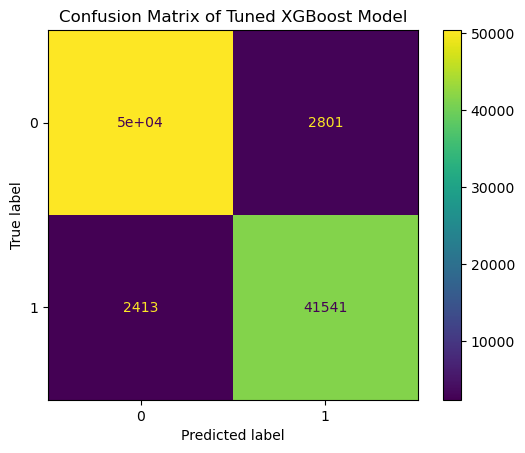

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     53161
           1       0.94      0.95      0.94     43954

    accuracy                           0.95     97115
   macro avg       0.95      0.95      0.95     97115
weighted avg       0.95      0.95      0.95     97115



In [76]:
print('1. Train-set')
conf_matrix(best_XGB_model, X_train, y_train)

2. Test-set


<Figure size 800x800 with 0 Axes>

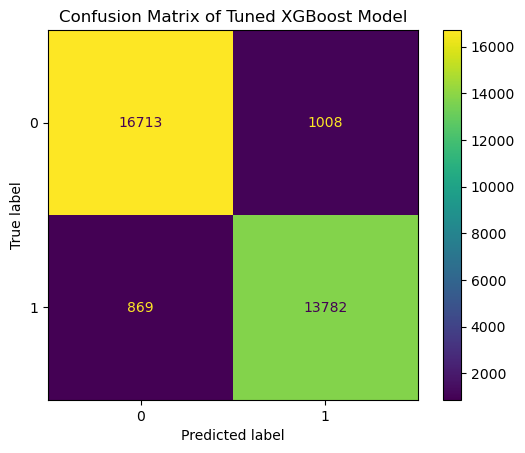

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     17721
           1       0.93      0.94      0.94     14651

    accuracy                           0.94     32372
   macro avg       0.94      0.94      0.94     32372
weighted avg       0.94      0.94      0.94     32372



In [77]:
print('2. Test-set')
conf_matrix(best_XGB_model, X_test, y_test)

Based on our observation of the recall scores between the train set and the test set, our model performs well in predicting the test set and effectively minimizes false negatives (train set: 0.95, test set: 0.94).   

# J. Model Saving  
  
Our best model will be saved in a single pickle file, thanks to its compact form achieved through the pipeline process.

In [72]:
with open('model.pkl', 'wb') as file_1:
    pickle.dump(best_XGB_model, file_1)

# K. Conclusion  
  
- **Exploratory Data Analysis (EDA)** 
  - The data used in this model is considered as a good data due to its characteristic of relatively well-balanced data according to its target property
  - This data is good for classification since most of its features were in category form and is considered as non-complex data with relatively limited-data engineering needed.
  - In regards to the previous point, it also requires no principal component analysis due to lack of continuous data.
  - We suggest to built airline service satisfaction model prediction using this dataset.
    
- **Modeling**
  - From my experience during model development, understanding our data well is crucial to avoid prolonged data fitting using a model that may not be optimized for the dataset. In this case, we opted not to use SVM due to the complexity and high dimensionality of the data, allowing us to focus our time and resources on finding the best alternative model.
  - I recommend using the XGBoosting model for training with this dataset. It requires fewer resources than other vector-based models but maintains and improves its performance over iterations. 
  - Our model achieved a recall score of 0.95 in the train set and 0.94 in the test set, indicating that our selected model is well-suited to the dataset and ready for public use with inference/unseen data and deployment-based publication.